In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load, clean up datasets
trad22 = pd.read_csv("nba_traditional22.csv")
trad22 = trad22[trad22.GP >= 41]
trad22 = trad22[['PLAYER', 'AGE', 'PTS', 'FG%', '3P%', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF']]

positions = pd.read_csv("NBA22.csv")#, skiprows=1)
positions = positions.rename(columns={"FULL NAME": "PLAYER", "POS": "POSITION"})

nba = trad22.merge(positions[['PLAYER', 'POSITION']], on='PLAYER')

In [3]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

def slope(x, y):
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return  correlation(x, y)* np.std(y,ddof=1)/np.std(x,ddof=1)

def intercept(x, y):
    b1 = slope(x, y)
    return np.average(y) - b1 * np.average(x)

def fitted_values(x, y):
    """Return an array of the regressions estimates at all the x values"""
    b1 = slope(x, y)
    b0 = intercept(x, y)
    return b1*x + b0

def residuals(x, y):
    return y - fitted_values(x, y)

In [6]:
# Simplify position classifications ("F-C" becomes "C", "F-G" becomes "G")
def simplify_position(pos):
  if "C" in str(pos):
    return "C"
  elif "G" in str(pos):
    return "G"
  else:
    return "F"

nba.POSITION = nba.POSITION.apply(simplify_position)

In [7]:
nba.sort_values("AGE", ascending = True)

,PLAYER,AGE,PTS,FG%,3P%,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,POSITION
296,Josh Giddey,19,12.5,41.9,26.3,70.9,1.8,6.0,7.8,6.4,3.2,0.9,0.4,1.6,G
85,Alperen Sengun,19,9.6,47.4,24.8,71.1,1.9,3.5,5.5,2.6,2.0,0.8,0.9,3.0,C
115,Jonathan Kuminga,19,9.3,51.3,33.6,68.4,0.8,2.6,3.3,0.9,1.1,0.4,0.3,2.1,F
332,Joshua Primo,19,5.8,37.4,30.7,74.6,0.6,1.6,2.3,1.6,1.1,0.4,0.5,1.6,G
308,Moses Moody,19,4.4,43.7,36.4,77.8,0.3,1.2,1.5,0.4,0.3,0.1,0.2,0.8,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Chris Paul,36,14.7,49.3,31.7,83.7,0.3,4.0,4.4,10.8,2.4,1.9,0.3,2.1,G
367,LaMarcus Aldridge,36,12.9,55.0,30.4,87.3,1.6,3.9,5.5,0.9,0.9,0.3,1.0,1.7,C
106,P.J. Tucker,36,7.6,48.4,41.5,73.8,1.4,4.0,5.5,2.1,0.9,0.8,0.2,2.3,F
269,LeBron James,37,30.3,52.4,35.9,75.6,1.1,7.1,8.2,6.2,3.5,1.3,1.1,2.2,F


<AxesSubplot:xlabel='AGE', ylabel='PTS'>

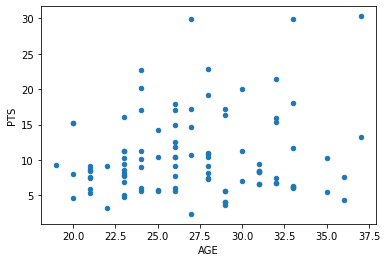

In [6]:
nba.loc[nba.POSITION=="F"].plot.scatter("AGE","PTS")

In [7]:
forwards = nba.loc[nba.POSITION=="F"].groupby("AGE", as_index=False).mean()
centers = nba.loc[nba.POSITION=="C"].groupby("AGE", as_index=False).mean()
guards = nba.loc[nba.POSITION=="G"].groupby("AGE", as_index=False).mean()

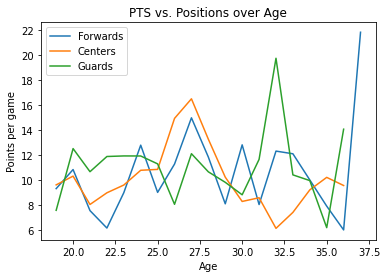

In [8]:
plt.plot(forwards.AGE, forwards.PTS, label = "Forwards")
plt.plot(centers.AGE, centers.PTS, label = "Centers")
plt.plot(guards.AGE, guards.PTS, label = "Guards")
plt.ylabel("Points per game")
plt.xlabel("Age")
plt.title("PTS vs. Positions over Age")
plt.legend()
plt.show()

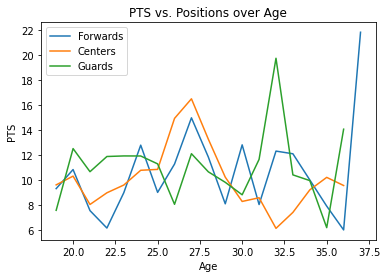

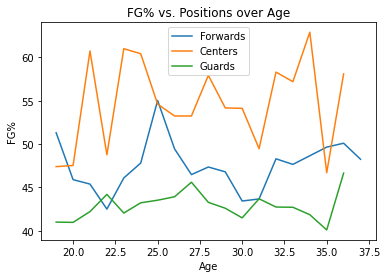

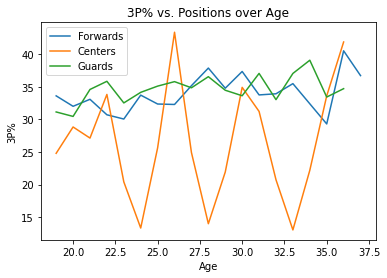

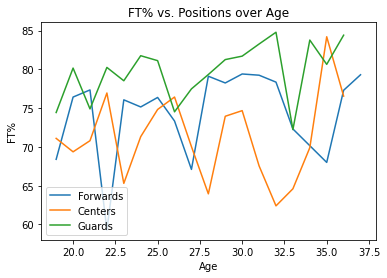

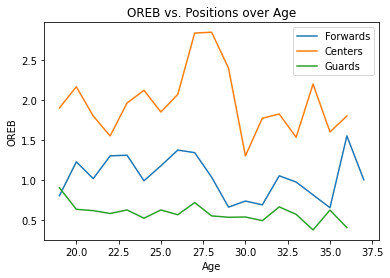

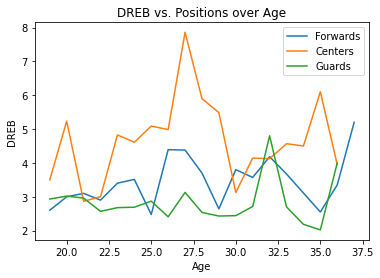

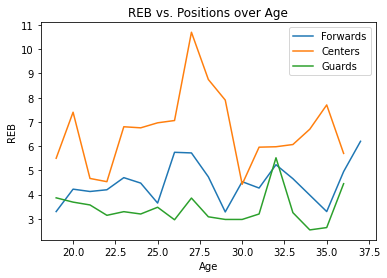

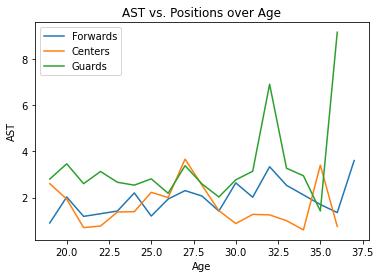

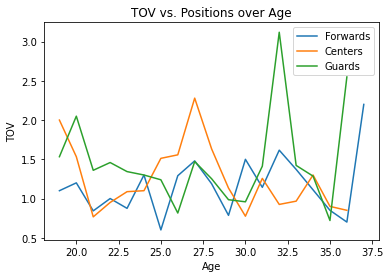

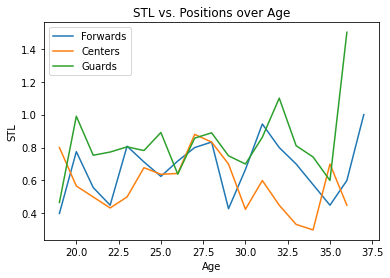

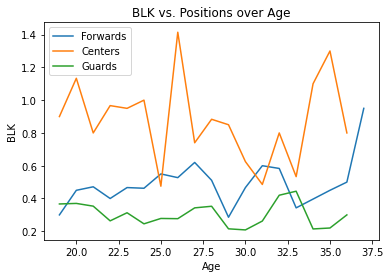

In [9]:
# Overview of various statistics categorized by position spread across ages
for x in range(0, len(forwards.columns[1:-1])):
    plt.figure(x)
    plt.plot(forwards.AGE, forwards[forwards.columns[x + 1]], label = "Forwards")
    plt.plot(centers.AGE, centers[centers.columns[x + 1]], label = "Centers")
    plt.plot(guards.AGE, guards[guards.columns[x + 1]], label = "Guards")
    plt.ylabel(forwards.columns[x+1])
    plt.xlabel("Age")
    plt.title(forwards.columns[x+1]+ " vs. Positions over Age")
    plt.legend()

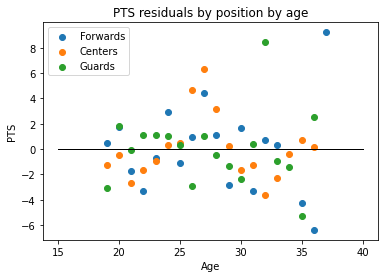

In [10]:
# residuals plot
plt.scatter(forwards.AGE, residuals(forwards.AGE,forwards.PTS), label="Forwards")
plt.scatter(centers.AGE, residuals(centers.AGE,centers.PTS), label="Centers")
plt.scatter(guards.AGE, residuals(guards.AGE,guards.PTS), label="Guards")
plt.title("PTS residuals by position by age")
plt.xlabel("Age")
plt.ylabel("PTS")
plt.legend()
plt.plot([15,40],[0,0],color="black",lw=1);

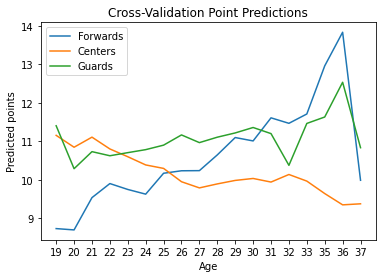

In [11]:
#forwards = nba.loc[nba.POSITION=="F"].groupby("AGE", as_index=True).mean()
#centers = nba.loc[nba.POSITION=="C"].groupby("AGE", as_index=True).mean()
#guards = nba.loc[nba.POSITION=="G"].groupby("AGE", as_index=True).mean()
# the cross-validation (leave-one-out) predictions
n=forwards.shape[0]

predictedf = np.array([])
    
for i in range(n):
    # drop the row indexed by i
    tmp_df=forwards.drop(i)

    #the predicted price
    tmp_pred=intercept(tmp_df.AGE,tmp_df.PTS) \
            +slope(tmp_df.AGE,tmp_df.PTS)*forwards.AGE[i]    

    # appending the result
    predictedf = np.append(predictedf, tmp_pred)
    
predictedf[0:10]
plt.plot(predictedf, label = "Forwards")
#########################Centers
# the cross-validation (leave-one-out) predictions
n=centers.shape[0]

predictedc = np.array([])
    
for i in range(n):
    # drop the row indexed by i
    tmp_df=centers.drop(i)

    #the predicted price
    tmp_pred=intercept(tmp_df.AGE,tmp_df.PTS) \
            +slope(tmp_df.AGE,tmp_df.PTS)*centers.AGE[i]    

    # appending the result
    predictedc = np.append(predictedc, tmp_pred)
    
predictedc[0:10]
plt.plot(predictedc, label = "Centers")
####################Guards
# the cross-validation (leave-one-out) predictions
n=guards.shape[0]

predictedg = np.array([])
    
for i in range(n):
    # drop the row indexed by i
    tmp_df=guards.drop(i)

    #the predicted price
    tmp_pred=intercept(tmp_df.AGE,tmp_df.PTS) \
            +slope(tmp_df.AGE,tmp_df.PTS)*guards.AGE[i]    

    # appending the result
    predictedg = np.append(predictedg, tmp_pred)
    
predictedg[0:10]
plt.plot(predictedg, label = "Guards")
plt.legend()
plt.ylabel("Predicted points")
plt.xlabel("Age")
plt.title("Cross-Validation Point Predictions")

x = forwards.AGE
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.show()

In [12]:
# this is residual sum of squares function
from scipy.optimize import minimize
tmp_df=forwards

def rss(b):
    ''' rss(b)
    b[0] offset
    b[1] Age coefficient
    b[2] Rebounds coefficient
    b[3] Assists coefficient
    returns sums squared error for y= b0+ x1*b1+x2*b2+x3*b3 where
    x is taken from columns in temp_df'''
    estimate = b[0]+b[1]*tmp_df.AGE+b[2]*tmp_df.REB+b[3]*tmp_df.AST
    return (np.mean((tmp_df.PTS - estimate) ** 2))

# the estimated values of the parameters
minimize(rss,x0=[0,0,0,0],method="BFGS").x

array([ 2.4424847 , -0.13915341,  0.93550726,  4.01327501])

In [13]:
#This is the multivariate model for forwards, which takes in three variables (Age, Rebounds, and Assists)
# In order to calculate the predicted points per game of each year.
n=forwards.shape[0]

predictedf1 = np.array([])
    
for i in range(n):
    # drop the i-th row
    tmp_df=forwards.drop(i)

    # the estimated values of the parameters
    tmp_fit=minimize(rss,x0=[0,0,0,0],method="BFGS").x

    #the predicted price
    tmp_pred=tmp_fit[0]+tmp_fit[1]*forwards.AGE[i] \
            +tmp_fit[2]*forwards.REB[i]+tmp_fit[3]*forwards.AST[i]
    
    # appending the result
    predictedf1 = np.append(predictedf1, tmp_pred)

In [14]:
###########Centers#######################
tmp_df=centers
n=centers.shape[0]

predictedc1 = np.array([])
    
for i in range(n):
    # drop the i-th row
    tmp_df=centers.drop(i)

    # the estimated values of the parameters
    tmp_fit=minimize(rss,x0=[0,0,0,0],method="BFGS").x

    #the predicted price
    tmp_pred=tmp_fit[0]+tmp_fit[1]*centers.AGE[i] \
            +tmp_fit[2]*centers.REB[i]+tmp_fit[3]*centers.AST[i]
    
    # appending the result
    predictedc1 = np.append(predictedc1, tmp_pred)
###########Guards#######################
tmp_df=guards
n=guards.shape[0]

predictedg1 = np.array([])
    
for i in range(n):
    # drop the i-th row
    tmp_df=guards.drop(i)

    # the estimated values of the parameters
    tmp_fit=minimize(rss,x0=[0,0,0,0],method="BFGS").x

    #the predicted price
    tmp_pred=tmp_fit[0]+tmp_fit[1]*guards.AGE[i] \
            +tmp_fit[2]*guards.REB[i]+tmp_fit[3]*guards.AST[i]
    
    # appending the result
    predictedg1 = np.append(predictedg1, tmp_pred)

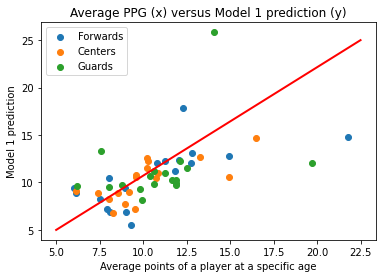

In [15]:
#This is a comparison of a multivariate regression model prediction of points per game
#Based on three statistics: Age, Rebounds, and Assists, and categorized by position
plt.scatter(forwards.PTS,predictedf1, label = "Forwards")
plt.scatter(centers.PTS,predictedc1, label = "Centers")
plt.scatter(guards.PTS,predictedg1, label = "Guards")
plt.plot([5,22.5],[5,25],color="red",lw=2)
plt.xlabel("Average points of a player at a specific age")
plt.ylabel("Model 1 prediction")
plt.title('Average PPG (x) versus Model 1 prediction (y)')
plt.legend()
plt.show()

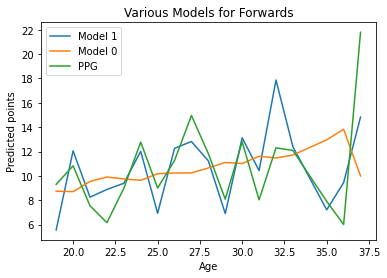

In [16]:
#A graph of the various statistical models for forwards
plt.plot(forwards.AGE, predictedf1, label = "Model 1")
plt.plot(forwards.AGE, predictedf, label = "Model 0")
plt.plot(forwards.AGE, forwards.PTS, label = "PPG")
plt.ylabel("Predicted points")
plt.xlabel("Age")
plt.title("Various Models for Forwards")
plt.legend()
plt.show()

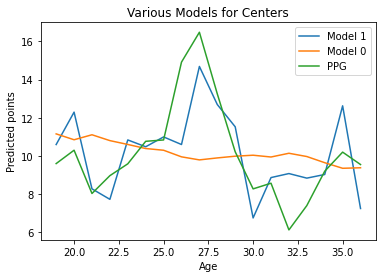

In [17]:
#A graph of the various statistical models for centers
plt.plot(centers.AGE, predictedc1, label = "Model 1")
plt.plot(centers.AGE, predictedc, label = "Model 0")
plt.plot(centers.AGE, centers.PTS, label = "PPG")
plt.ylabel("Predicted points")
plt.xlabel("Age")
plt.title("Various Models for Centers")
plt.legend()
plt.show()

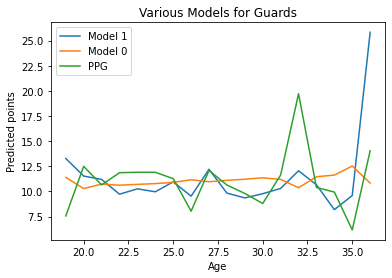

In [18]:
#A graph of the various statistical models for guards
plt.plot(guards.AGE, predictedg1, label = "Model 1")
plt.plot(guards.AGE, predictedg, label = "Model 0")
plt.plot(guards.AGE, guards.PTS, label = "PPG")
plt.ylabel("Predicted points")
plt.xlabel("Age")
plt.title("Various Models for Guards")
plt.legend()
plt.show()

In [19]:
#This function predicts a players points per game in the next year.
def predPlayer(player):
    player.AGE = player.AGE + 1
    playerType = np.array([])
    forwards = nba.loc[nba.POSITION=="F"].groupby("AGE", as_index=False).mean()
    centers = nba.loc[nba.POSITION=="C"].groupby("AGE", as_index=False).mean()
    guards = nba.loc[nba.POSITION=="G"].groupby("AGE", as_index=False).mean()
    if player.POSITION == "F":
        playerType = forwards
    elif player.POSITION == "C":
        playerType = centers
    else:
        playerType = guards
    playerType.loc[len(playerType.index)] = player
    predictedp1 = np.array([])
    n=playerType.shape[0]
    for i in range(n):
        # drop the i-th row
        tmp_df=playerType.drop(i)

        # the estimated values of the parameters
        tmp_fit=minimize(rss,x0=[0,0,0,0],method="BFGS").x

        #the predicted price
        tmp_pred=tmp_fit[0]+tmp_fit[1]*playerType.AGE[i] \
                +tmp_fit[2]*playerType.REB[i]+tmp_fit[3]*playerType.AST[i]

        # appending the result
        predictedp1 = np.append(predictedp1, tmp_pred)
    print("Predicted points: ")
    print(predictedp1[-1])
    print(" Actual points ")
    print(player.PTS)
    plt.scatter(player.AGE, predictedp1[-1], label = "Player Prediction", color = "red")
    plt.scatter(player.AGE-1, player.PTS, label = "Current Year", color = "orange")
    playerType.drop(playerType.tail(1).index,inplace=True)
    predictedp1 = predictedp1[:len(predictedp1)-1]
    plt.plot(playerType.AGE, predictedp1, label = "Model 1")
    plt.title(player.PLAYER + " : " + player.POSITION)
    plt.legend()
    plt.xlabel("Age")
    plt.ylabel("PPG")
    plt.show()

C:\Users\matan\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


Predicted points: 
11.239337499619424
 Actual points 
12.7


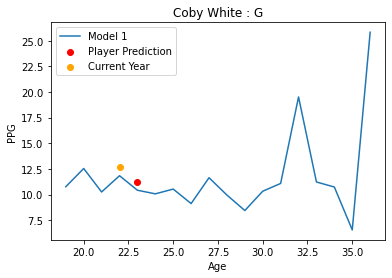

C:\Users\matan\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


Predicted points: 
12.89886905616575
 Actual points 
20.7


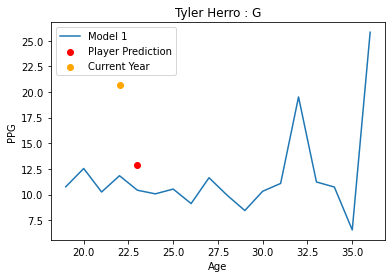

In [26]:
#Various examples of player predictions
#predPlayer(nba.loc[170])
#predPlayer(nba.loc[172])
#predPlayer(nba.loc[60])
predPlayer(nba.loc[226])
predPlayer(nba.loc[171])


In [22]:
nba.loc[nba.AGE == 22]

,PLAYER,AGE,PTS,FG%,3P%,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,POSITION
21,Immanuel Quickley,22,11.3,39.2,34.6,88.1,0.4,2.8,3.2,3.5,1.3,0.7,0.0,2.1,G
23,Jaren Jackson Jr.,22,16.3,41.5,31.9,82.3,1.5,4.3,5.8,1.1,1.7,0.9,2.3,3.5,C
27,Ayo Dosunmu,22,8.8,52.0,37.6,67.9,0.4,2.4,2.8,3.3,1.4,0.8,0.4,2.4,G
33,Naz Reid,22,8.3,48.9,34.3,76.5,1.3,2.6,3.9,0.9,1.1,0.5,0.9,2.2,C
35,Tyrese Haliburton,22,15.3,47.3,41.4,84.2,0.8,3.2,4.0,8.2,2.6,1.7,0.6,1.6,G
36,Tyrese Haliburton,22,15.3,47.3,41.4,84.2,0.8,3.2,4.0,8.2,2.6,1.7,0.6,1.6,G
43,Jordan Poole,22,18.5,44.8,36.4,92.5,0.4,3.0,3.4,4.0,2.5,0.8,0.3,2.7,G
55,Keldon Johnson,22,17.0,46.6,39.8,75.6,1.1,5.0,6.1,2.1,1.2,0.8,0.2,2.0,G
81,Precious Achiuwa,22,9.1,43.9,35.9,59.5,2.0,4.5,6.5,1.1,1.2,0.5,0.6,2.1,F
130,Tre Jones,22,6.0,49.0,19.6,78.0,0.4,1.8,2.2,3.4,0.7,0.6,0.1,1.1,G
